In [41]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

%matplotlib inline

####  4.(a) Draw $n = 5$ samples from the standard Gaussian distribution, $\mathcal{N} (0, 1)$

In [118]:
N_SAMPLES = 5

In [119]:
gaussian_samples = np.random.normal(loc=0, scale=1, size=N_SAMPLES)
print("Five samples from the distribution:", gaussian_samples)

Five samples from the distribution: [-0.80701842  1.69394429  0.35480694 -2.33606765  0.61997977]


#### 4.(b) Using the samples as data, compute the ML estimate $\hat\mu$ for the mean and $\hat\sigma^2$ for the variance of the Gaussian, as given in Question 3(d) above.

In [127]:
def mle_params(samples):
    mean_hat = np.mean(samples)
    var_hat = np.var(samples, ddof=0)
    return mean_hat, var_hat

mean_hat, var_hat = mle_params(gaussian_samples)
print("ML estimate for the mean:", mean_hat)
print("ML estimate for the variance:", var_hat)

ML estimate for the mean: 0.232165879467
ML estimate for the variance: 1.88863968334


#### 4.(c) Repeat steps (a) and (b) 10,000 times. Plot a histogram of the 10,000 estimates of the Gaussian variance parameter to show its empirical distribution. Do you recognize its shape?

In [128]:
var_list = [mle_params(np.random.normal(loc=0, 
                                        scale=1, 
                                        size=N_SAMPLES
                                       )
                      )[1]    # select the second component of mlp_params
            for _ in range(10000) # repeat 10000 times
           ]

(array([ 124.,  319.,  466.,  523.,  575.,  522.,  568.,  532.,  547.,
         562.,  508.,  479.,  470.,  396.,  357.,  332.,  274.,  271.,
         248.,  211.,  193.,  169.,  145.,  138.,  128.,  118.,  109.,
          85.,   65.,   59.,   58.,   64.,   51.,   46.,   26.,   31.,
          19.,   30.,   25.,   18.,   21.,   18.,   19.,   12.,    9.,
           4.,   10.,    8.,    4.,    2.,    8.,    0.,    4.,    1.,
           3.,    2.,    1.,    3.,    1.,    2.,    2.,    0.,    1.,
           2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([ 0.00634992,  0.06946114,  0.13257235,  0.19568357,  0.25879478,
         0.32190599,  0.38501721,  0.44812842,  0.51123964,  0.57435085,
         0.63746206,  0.70057328,  0.76368449,  0.8267957 ,  0.88990692,
         0.95301813,  1.01612935,  1.07924056,  1.14235177,  1.20546299,
         1.2685742 ,  1.33168542,  1.39479663,  1.45790784,  1.52101906,
         1.58413027,  1.64724148,  1

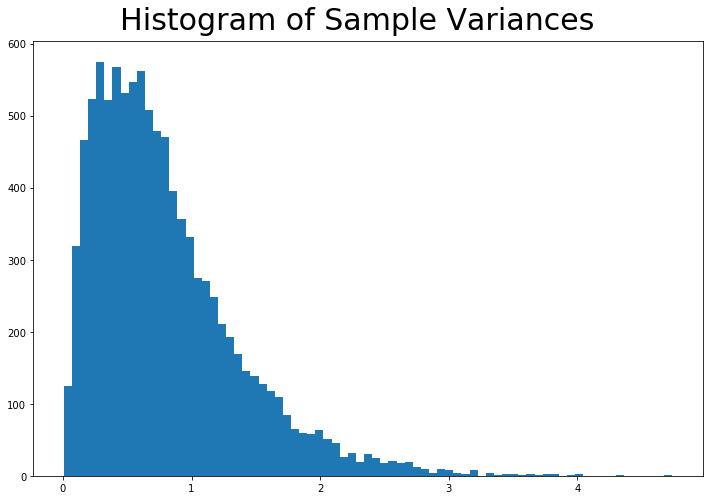

In [129]:
plt.figure(figsize=(12,8))
plt.figtext(0.5, 0.9, "Histogram of Sample Variances", fontsize=30, ha='center')
plt.hist(var_list, bins='fd')

The shape of the graph looks like that of a $\chi^2$-distribution

#### 4.(d) Use these 10,000 repeated trials to numerically estimate the (frequentist) bias and variance of the ML estimate $\hat\sigma^2$ of the Gaussian variance parameter.


In [130]:
print("Bias of the sample variance:", np.mean(var_list) - 1)

Bias of the sample variance: -0.204764647447


In [133]:
print("Variance of the sample variance:", np.var(var_list))

Variance of the sample variance: 0.318487111314


#### 4.(e) Compare the results of (d) with the theoretical (frequentist) bias and variance that you can compute from the formula you derived in Question 3(d).

In [132]:
print("Theoretical bias:", -1/5, "\tDifference:", np.mean(var_list) - 1 - (-1/5))
print("Theoretical variance:", 8/25, "\tDifference:", np.var(var_list) - (8/25))

Theoretical bias: -0.2 	Difference: -0.00476464744738
Theoretical variance: 0.32 	Difference: -0.00151288868553
